**Data perparation**

In [5]:
import pandas as pd

file_path = 'data_set.xlsx'
data = pd.read_excel(file_path)

active_user_ids = [2, 5, 16]

user_counts = []

for active_user_id in active_user_ids:

    active_user_ratings = data[data['user_id'] == active_user_id][['movie_1', 'movie_2', 'movie_3', 'movie_4', 'movie_5', 'movie_6']].values.flatten()

    co_rated_users = data[data['user_id'] != active_user_id]

    no_common_users = 0
    no_co_rated_items = 0

    for _, row in co_rated_users.iterrows():

        common_movies = 0
        for i, movie_rating in enumerate(active_user_ratings):
            if pd.notna(movie_rating) and pd.notna(row[f'movie_{i+1}']):
                common_movies += 1
        if common_movies > 0:
            no_common_users += 1
            no_co_rated_items += common_movies

    user_counts.append([no_common_users, no_co_rated_items])

user_counts_df = pd.DataFrame(user_counts, columns=['No_common_users', 'No_coRated_items'])
sorted_user_counts = user_counts_df.sort_values(by='No_common_users', ascending=False)

sorted_user_counts_array = sorted_user_counts.to_numpy()

sorted_user_counts_array


array([[19, 70],
       [18, 53],
       [18, 18]])

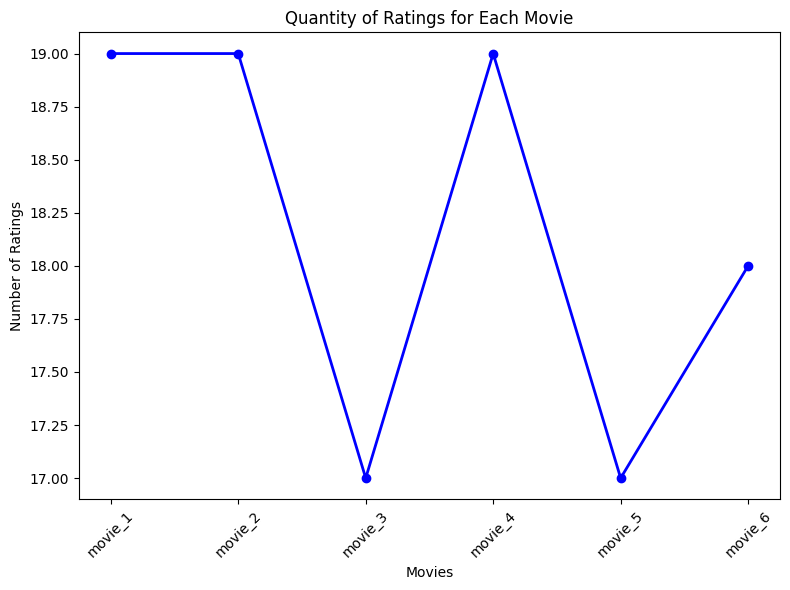

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'data_set.xlsx'
data = pd.read_excel(file_path)

rating_counts = data[['movie_1', 'movie_2', 'movie_3', 'movie_4', 'movie_5', 'movie_6']].notna().sum()

plt.figure(figsize=(8, 6))
plt.plot(rating_counts.index, rating_counts.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)

plt.xlabel('Movies')
plt.ylabel('Number of Ratings')
plt.title('Quantity of Ratings for Each Movie')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Case Study 1.1 :

In [25]:
import numpy as np
import pandas as pd

class RecommenderSystem:
    def __init__(self, ratings):
        self.ratings = ratings.set_index('user_id')

    def cosine_similarity(self, user1, user2):

        user1_ratings = self.ratings.loc[user1]
        user2_ratings = self.ratings.loc[user2]

        common_items = user1_ratings.dropna().index.intersection(user2_ratings.dropna().index)

        if len(common_items) == 0:
            return 0.0

        user1_common = user1_ratings[common_items]
        user2_common = user2_ratings[common_items]

        dot_product = np.dot(user1_common, user2_common)
        norm_user1 = np.linalg.norm(user1_common)
        norm_user2 = np.linalg.norm(user2_common)

        if norm_user1 * norm_user2 == 0:
            return 0.0

        return dot_product / (norm_user1 * norm_user2)

        def get_top_20_percent_neighbors(self, user: int) -> Dict[int, float]:
         similarities = {}

        for other_user in self.ratings.index:
            if other_user != user:
                similarity = self.cosine_similarity(user, other_user)
                similarities[other_user] = similarity

        sorted_similarities = dict(sorted(similarities.items(), key=lambda x: x[1], reverse=True))

        top_20_percent_count = max(1, int(len(sorted_similarities) * 0.2))
        top_20_percent_neighbors = dict(list(sorted_similarities.items())[:top_20_percent_count])

        return top_20_percent_neighbors

file_path = 'data_set.xlsx'
dataset = pd.read_excel(file_path)
recommender_system = RecommenderSystem(dataset)
active_users = [2, 5, 16]
similarities = {}

for active_user in active_users:
    if active_user in recommender_system.ratings.index:
        for other_user in recommender_system.ratings.index:
            if active_user != other_user:
                similarity = recommender_system.cosine_similarity(active_user, other_user)
                similarities[(active_user, other_user)] = similarity

print("All computed similarities between active users and all users:")
for (active_user, other_user), similarity in similarities.items():
    print(f"Active User {active_user} vs User {other_user}: Similarity = {similarity:.4f}")

All computed similarities between active users and all users:
Active User 2 vs User 1: Similarity = 0.9002
Active User 2 vs User 3: Similarity = 0.8036
Active User 2 vs User 4: Similarity = 0.8568
Active User 2 vs User 5: Similarity = 0.9939
Active User 2 vs User 6: Similarity = 0.9417
Active User 2 vs User 7: Similarity = 0.9781
Active User 2 vs User 8: Similarity = 0.8868
Active User 2 vs User 9: Similarity = 0.9563
Active User 2 vs User 10: Similarity = 0.9207
Active User 2 vs User 11: Similarity = 0.9444
Active User 2 vs User 12: Similarity = 0.9483
Active User 2 vs User 13: Similarity = 0.9435
Active User 2 vs User 14: Similarity = 0.9789
Active User 2 vs User 15: Similarity = 0.9094
Active User 2 vs User 16: Similarity = 1.0000
Active User 2 vs User 17: Similarity = 0.8659
Active User 2 vs User 18: Similarity = 0.9940
Active User 2 vs User 19: Similarity = 0.9789
Active User 2 vs User 20: Similarity = 0.7585
Active User 5 vs User 1: Similarity = 0.9200
Active User 5 vs User 2: Si

In [27]:
import pandas as pd
import numpy as np
from typing import Dict

class UserCollaborativeFiltering:
    def __init__(self, ratings: pd.DataFrame):
        self.ratings = ratings.set_index('user_id')

    def cosine_similarity(self, user1: int, user2: int) -> float:
        # Get ratings for both users
        user1_ratings = self.ratings.loc[user1]
        user2_ratings = self.ratings.loc[user2]

        # Find common items
        common_items = user1_ratings.dropna().index.intersection(user2_ratings.dropna().index)

        if len(common_items) == 0:
            return 0.0

        user1_common = user1_ratings[common_items]
        user2_common = user2_ratings[common_items]

        numerator = np.dot(user1_common, user2_common)
        denominator = np.sqrt(np.dot(user1_common, user1_common)) * np.sqrt(np.dot(user2_common, user2_common))

        return numerator / denominator if denominator != 0 else 0.0

    def get_top_20_percent_neighbors(self, user: int) -> Dict[int, float]:
        similarities = {}

        for other_user in self.ratings.index:
            if other_user != user:
                similarity = self.cosine_similarity(user, other_user)
                similarities[other_user] = similarity

        sorted_similarities = dict(sorted(similarities.items(), key=lambda x: x[1], reverse=True))

        top_20_percent_count = max(1, int(len(sorted_similarities) * 0.2))
        top_20_percent_neighbors = dict(list(sorted_similarities.items())[:top_20_percent_count])

        return top_20_percent_neighbors


file_path = 'data_set.xlsx'
ratings_data = pd.read_excel(file_path)

collaborative_filtering = UserCollaborativeFiltering(ratings_data)

active_users = [2, 5, 16]

active_users_top_20_percent = {}
for user in active_users:
    active_users_top_20_percent[user] = collaborative_filtering.get_top_20_percent_neighbors(user=user)

for user, neighbors in active_users_top_20_percent.items():
    print(f"User {user}: Top 20% closest users -> {neighbors}")

User 2: Top 20% closest users -> {16: 1.0, 18: 0.9939639369452532, 5: 0.9938837346736188}
User 5: Top 20% closest users -> {13: 0.9999999999999999, 2: 0.9938837346736188, 9: 0.9922426389474776}
User 16: Top 20% closest users -> {1: 1.0, 2: 1.0, 3: 1.0}


In [28]:
import numpy as np
import pandas as pd

class RecommenderSystem:
    def __init__(self, ratings, threshold=5):
        self.ratings = ratings.set_index('user_id')
        self.threshold = threshold
    def cosine_similarity(self, user1, user2):
        """Calculate cosine similarity using raw ratings."""
        user1_ratings = self.ratings.loc[user1]
        user2_ratings = self.ratings.loc[user2]

        common_items = user1_ratings.dropna().index.intersection(user2_ratings.dropna().index)
        if len(common_items) == 0:
            return 0.0, 0

        user1_common = user1_ratings[common_items]
        user2_common = user2_ratings[common_items]

        dot_product = np.dot(user1_common, user2_common)
        norm_user1 = np.linalg.norm(user1_common)
        norm_user2 = np.linalg.norm(user2_common)

        if norm_user1 * norm_user2 == 0:
            return 0.0, len(common_items)

        similarity = dot_product / (norm_user1 * norm_user2)
        return similarity, len(common_items)

    def compute_df(self, n_common):
        return min(n_common, self.threshold) / self.threshold


dataset = pd.read_excel("data_set.xlsx")

recommender_system = RecommenderSystem(dataset, threshold=2)

active_users = [2, 5, 16]

discounted_similarities = {}

for active_user in active_users:
    if active_user in recommender_system.ratings.index:
        for other_user in recommender_system.ratings.index:
            if active_user != other_user:
                similarity, n_common = recommender_system.cosine_similarity(active_user, other_user)
                df = recommender_system.compute_df(n_common)
                ds = df * similarity
                discounted_similarities[(active_user, other_user)] = (similarity, df, ds)

print("Discounted Similarities for Active Users:")
for (active_user, other_user), (similarity, df, ds) in discounted_similarities.items():
    print(f"Active User {active_user} vs User {other_user}:")
    print(f"    Cosine Similarity = {similarity:.4f}")
    print(f"    Discount Factor (DF) = {df:.4f}")
    print(f"    Discounted Similarity (DS) = {ds:.4f}")


Discounted Similarities for Active Users:
Active User 2 vs User 1:
    Cosine Similarity = 0.9002
    Discount Factor (DF) = 1.0000
    Discounted Similarity (DS) = 0.9002
Active User 2 vs User 3:
    Cosine Similarity = 0.8036
    Discount Factor (DF) = 1.0000
    Discounted Similarity (DS) = 0.8036
Active User 2 vs User 4:
    Cosine Similarity = 0.8568
    Discount Factor (DF) = 1.0000
    Discounted Similarity (DS) = 0.8568
Active User 2 vs User 5:
    Cosine Similarity = 0.9939
    Discount Factor (DF) = 1.0000
    Discounted Similarity (DS) = 0.9939
Active User 2 vs User 6:
    Cosine Similarity = 0.9417
    Discount Factor (DF) = 1.0000
    Discounted Similarity (DS) = 0.9417
Active User 2 vs User 7:
    Cosine Similarity = 0.9781
    Discount Factor (DF) = 1.0000
    Discounted Similarity (DS) = 0.9781
Active User 2 vs User 8:
    Cosine Similarity = 0.8868
    Discount Factor (DF) = 1.0000
    Discounted Similarity (DS) = 0.8868
Active User 2 vs User 9:
    Cosine Similarity =